In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Define the paths to the datasets
normal_dir = '/content/drive/MyDrive/AYYO DEVARE/Result/NORMAL ENC 3.5'
benign_dir = '/content/drive/MyDrive/AYYO DEVARE/Result/BENIGN ENC 3.5'
malignant_dir = '/content/drive/MyDrive/AYYO DEVARE/Result/MALIGNANT ENC 3.5'

# Classes and directories
classes = ['normal', 'benign', 'malignant']
input_dirs = [normal_dir, benign_dir, malignant_dir]

# Function to load images from a directory and return as numpy arrays
def load_images_from_directory():
    images = []
    labels = []
    for label, class_dir in enumerate(input_dirs):
        for file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, file)
            img = load_img(img_path, target_size=(224, 224))
            img_array = img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

# Load images and labels from directories
all_images, all_labels = load_images_from_directory()

# Normalize the images
all_images = all_images / 255.0

# Convert labels to categorical
all_labels = to_categorical(all_labels, num_classes=len(classes))

# Split the dataset: 70% train, 20% test, 10% validation
train_images, temp_images, train_labels, temp_labels = train_test_split(
    all_images, all_labels, test_size=0.3, random_state=42, stratify=all_labels)

val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=2/3, random_state=42, stratify=temp_labels)

57/57 [==============================] - 58s 1s/step
Random Forest Combined Test accuracy: 0.8719
Random Forest Combined Test loss: 0.3710
Random Forest Classification Report:
              precision    recall  f1-score   support

      Normal       0.80      0.85      0.83       900
      Benign       0.83      0.79      0.81       900
   Malignant       0.99      0.97      0.98       900

    accuracy                           0.87      2700
   macro avg       0.87      0.87      0.87      2700
weighted avg       0.87      0.87      0.87      2700



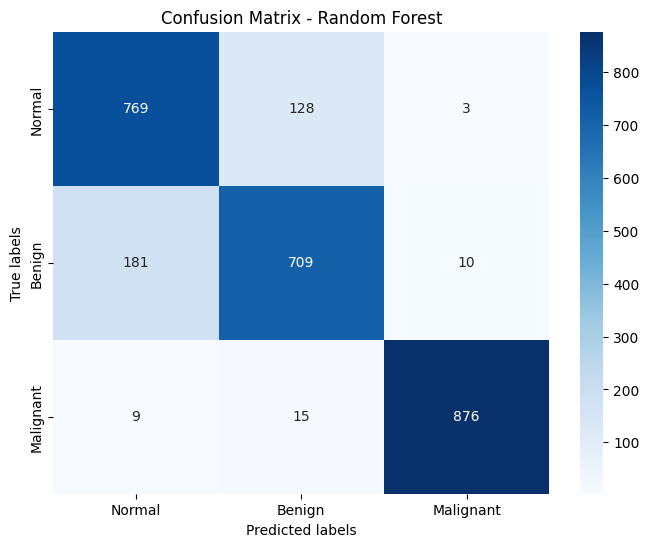

SVM Combined Test accuracy: 0.8922
SVM Combined Test loss: 0.2881
SVM Classification Report:
              precision    recall  f1-score   support

      Normal       0.85      0.85      0.85       900
      Benign       0.84      0.85      0.84       900
   Malignant       0.99      0.98      0.98       900

    accuracy                           0.89      2700
   macro avg       0.89      0.89      0.89      2700
weighted avg       0.89      0.89      0.89      2700



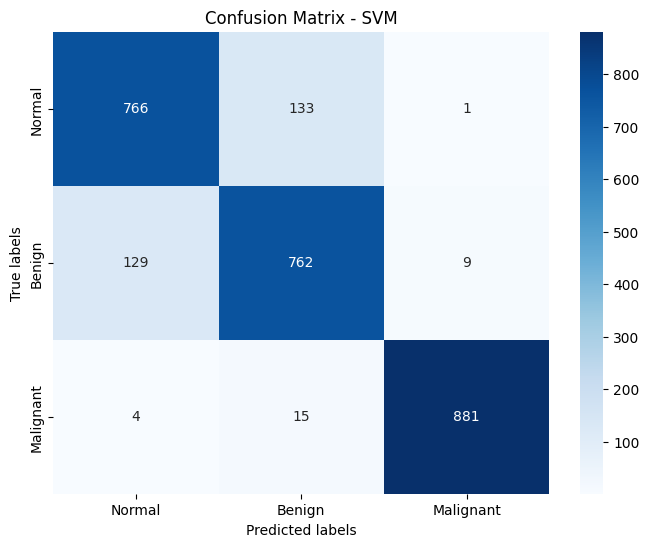

XGBoost Combined Test accuracy: 0.8933
XGBoost Combined Test loss: 0.3101
XGBoost Classification Report:
              precision    recall  f1-score   support

      Normal       0.84      0.87      0.86       900
      Benign       0.85      0.84      0.84       900
   Malignant       0.98      0.98      0.98       900

    accuracy                           0.89      2700
   macro avg       0.89      0.89      0.89      2700
weighted avg       0.89      0.89      0.89      2700



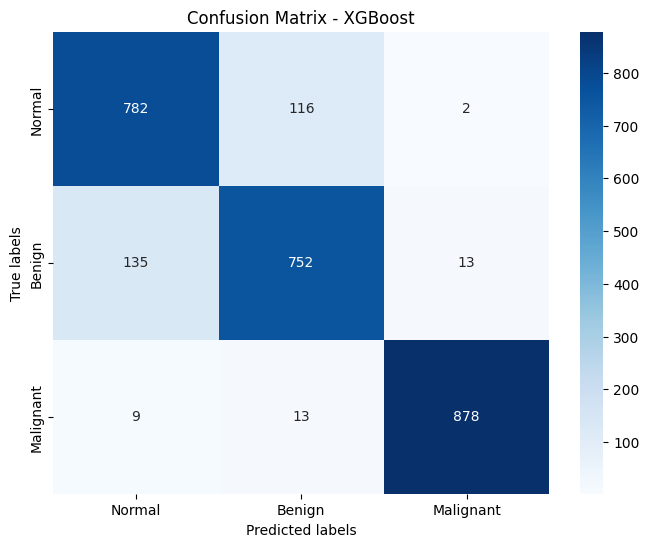

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


SVM + XGBoost Ensemble Combined Test accuracy: 0.8974
SVM + XGBoost Ensemble Combined Test loss: 0.2649
SVM + XGBoost Ensemble Classification Report:
              precision    recall  f1-score   support

      Normal       0.85      0.87      0.86       900
      Benign       0.86      0.84      0.85       900
   Malignant       0.99      0.98      0.98       900

    accuracy                           0.90      2700
   macro avg       0.90      0.90      0.90      2700
weighted avg       0.90      0.90      0.90      2700



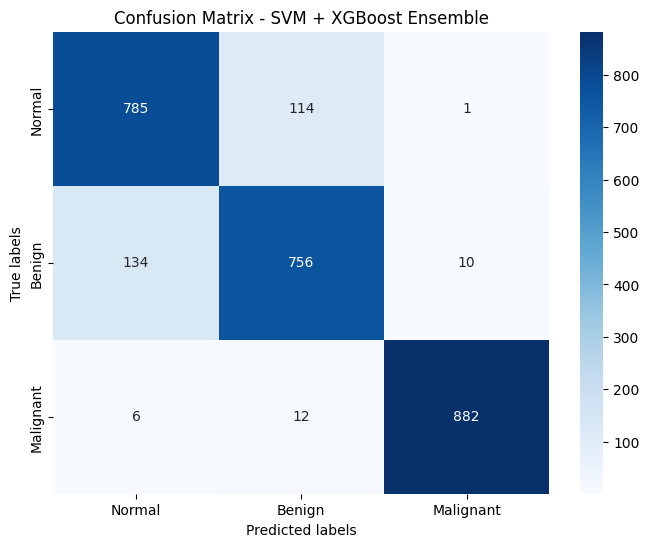

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Combined Ensemble Combined Test accuracy: 0.8996
Combined Ensemble Combined Test loss: 0.2818
Combined Ensemble Classification Report:
              precision    recall  f1-score   support

      Normal       0.86      0.87      0.86       900
      Benign       0.86      0.85      0.85       900
   Malignant       0.99      0.98      0.98       900

    accuracy                           0.90      2700
   macro avg       0.90      0.90      0.90      2700
weighted avg       0.90      0.90      0.90      2700



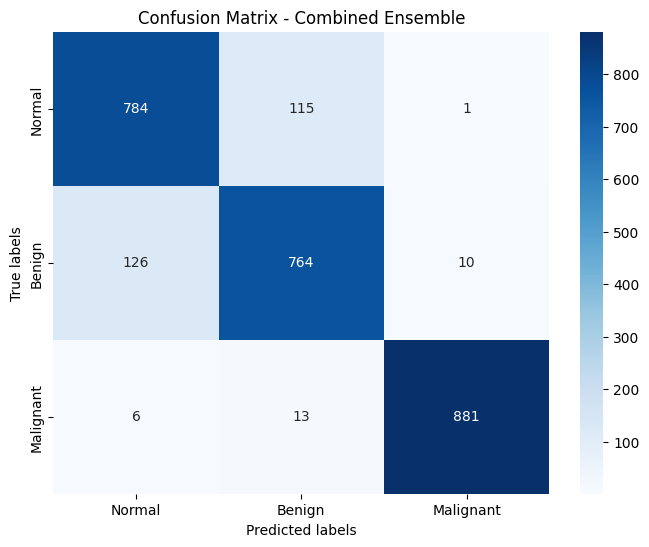

In [ ]:
import numpy as np
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

# Load DenseNet201 without top classification layers
densenet201_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add GlobalAveragePooling layer
densenet201_output = GlobalAveragePooling2D()(densenet201_model.output)

# Create model for feature extraction
densenet201_extractor = Model(inputs=densenet201_model.input, outputs=densenet201_output)

# Assuming train_images, train_labels, val_images, val_labels, test_images, test_labels are defined elsewhere

# Extract features from DenseNet201
train_features_densenet201 = densenet201_extractor.predict(train_images)
val_features_densenet201 = densenet201_extractor.predict(val_images)
test_features_densenet201 = densenet201_extractor.predict(test_images)

# Combine features
train_features = train_features_densenet201
val_features = val_features_densenet201
test_features = test_features_densenet201

# Combine validation and test features for classification
combined_features = np.concatenate((val_features, test_features), axis=0)
combined_labels = np.concatenate((np.argmax(val_labels, axis=1), np.argmax(test_labels, axis=1)), axis=0)

# Train individual classifiers
rf = RandomForestClassifier(n_estimators=100)
svm = SVC(probability=True)
xgb = XGBClassifier()

classifiers = {
    'Random Forest': rf,
    'SVM': svm,
    'XGBoost': xgb,
}

# Fit individual classifiers on the training features
for name, clf in classifiers.items():
    clf.fit(train_features, np.argmax(train_labels, axis=1))

# Create separate ensembles
svm_xgb_ensemble = VotingClassifier(estimators=[
    ('svm', svm),
    ('xgb', xgb)
], voting='soft')

# Fit SVM + XGBoost ensemble
svm_xgb_ensemble.fit(train_features, np.argmax(train_labels, axis=1))

# Create combined ensemble of RandomForest, SVM, and XGBoost
combined_ensemble = VotingClassifier(estimators=[
    ('rf', rf),
    ('svm', svm),
    ('xgb', xgb)
], voting='soft')

# Fit combined ensemble
combined_ensemble.fit(train_features, np.argmax(train_labels, axis=1))

# Evaluate individual classifiers and ensembles
for name, clf in classifiers.items():
    preds = clf.predict(combined_features)
    prob_preds = clf.predict_proba(combined_features)
    accuracy = accuracy_score(combined_labels, preds)
    loss = log_loss(combined_labels, prob_preds)
    print(f'{name} Combined Test accuracy: {accuracy:.4f}')
    print(f'{name} Combined Test loss: {loss:.4f}')

    conf_matrix = confusion_matrix(combined_labels, preds)
    print(f'{name} Classification Report:')
    print(classification_report(combined_labels, preds, target_names=['Normal', 'Benign', 'Malignant']))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Normal', 'Benign', 'Malignant'], yticklabels=['Normal', 'Benign', 'Malignant'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Evaluate SVM + XGBoost ensemble
for name, clf in {'SVM + XGBoost Ensemble': svm_xgb_ensemble}.items():
    preds = clf.predict(combined_features)
    prob_preds = clf.predict_proba(combined_features)
    accuracy = accuracy_score(combined_labels, preds)
    loss = log_loss(combined_labels, prob_preds)
    print(f'{name} Combined Test accuracy: {accuracy:.4f}')
    print(f'{name} Combined Test loss: {loss:.4f}')

    conf_matrix = confusion_matrix(combined_labels, preds)
    print(f'{name} Classification Report:')
    print(classification_report(combined_labels, preds, target_names=['Normal', 'Benign', 'Malignant']))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Normal', 'Benign', 'Malignant'], yticklabels=['Normal', 'Benign', 'Malignant'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Evaluate combined ensemble
for name, clf in {'Combined Ensemble': combined_ensemble}.items():
    preds = clf.predict(combined_features)
    prob_preds = clf.predict_proba(combined_features)
    accuracy = accuracy_score(combined_labels, preds)
    loss = log_loss(combined_labels, prob_preds)
    print(f'{name} Combined Test accuracy: {accuracy:.4f}')
    print(f'{name} Combined Test loss: {loss:.4f}')

    conf_matrix = confusion_matrix(combined_labels, preds)
    print(f'{name} Classification Report:')
    print(classification_report(combined_labels, preds, target_names=['Normal', 'Benign', 'Malignant']))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Normal', 'Benign', 'Malignant'], yticklabels=['Normal', 'Benign', 'Malignant'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


57/57 [==============================] - 8s 139ms/step
Random Forest Combined Test accuracy: 0.8530
Random Forest Combined Test loss: 0.4934
Random Forest Classification Report:
              precision    recall  f1-score   support

      Normal       0.78      0.83      0.81       900
      Benign       0.81      0.77      0.79       900
   Malignant       0.98      0.96      0.97       900

    accuracy                           0.85      2700
   macro avg       0.85      0.85      0.85      2700
weighted avg       0.85      0.85      0.85      2700



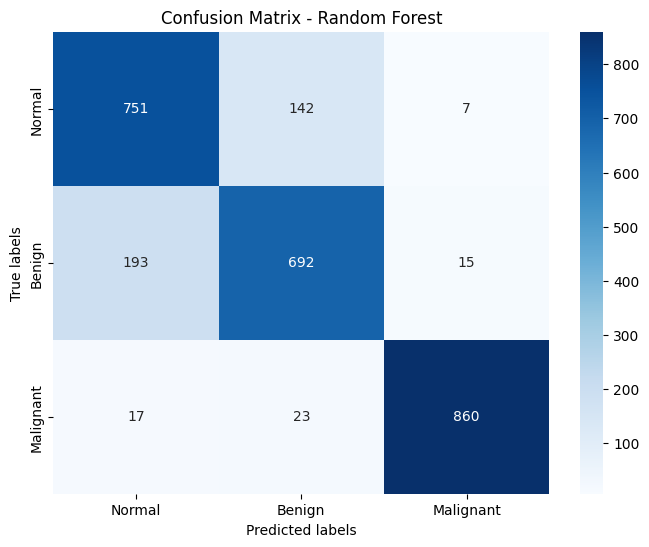

SVM Combined Test accuracy: 0.8833
SVM Combined Test loss: 0.2928
SVM Classification Report:
              precision    recall  f1-score   support

      Normal       0.84      0.83      0.84       900
      Benign       0.82      0.84      0.83       900
   Malignant       0.99      0.97      0.98       900

    accuracy                           0.88      2700
   macro avg       0.88      0.88      0.88      2700
weighted avg       0.88      0.88      0.88      2700



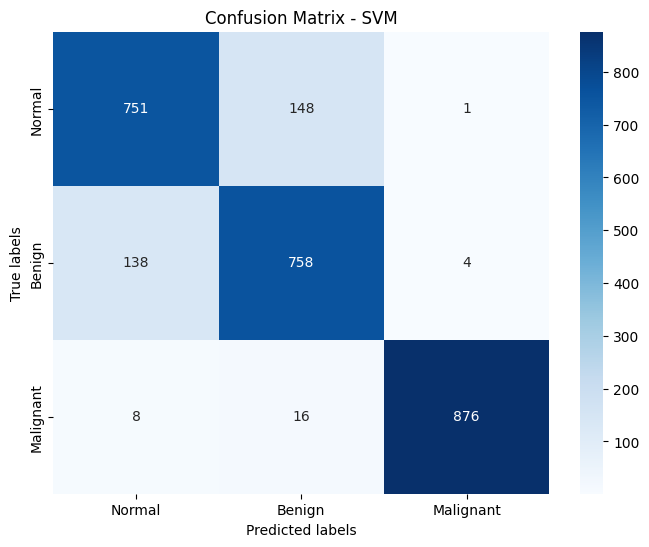

XGBoost Combined Test accuracy: 0.8785
XGBoost Combined Test loss: 0.3362
XGBoost Classification Report:
              precision    recall  f1-score   support

      Normal       0.83      0.83      0.83       900
      Benign       0.82      0.84      0.83       900
   Malignant       0.99      0.97      0.98       900

    accuracy                           0.88      2700
   macro avg       0.88      0.88      0.88      2700
weighted avg       0.88      0.88      0.88      2700



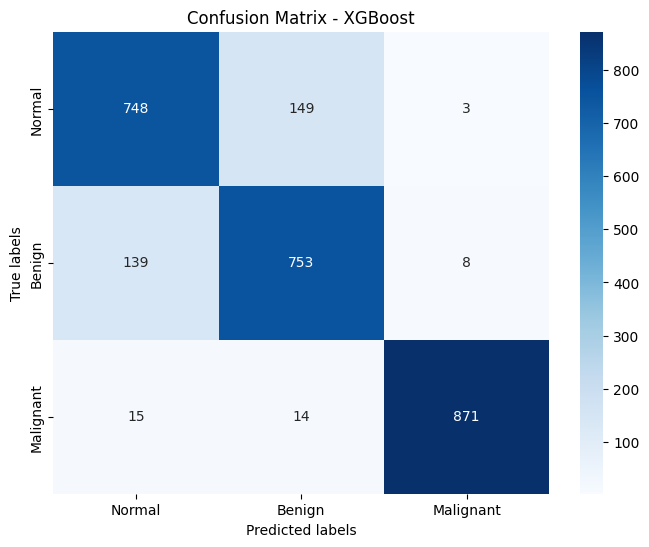

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


SVM + XGBoost Ensemble Combined Test accuracy: 0.8859
SVM + XGBoost Ensemble Combined Test loss: 0.2853
SVM + XGBoost Ensemble Classification Report:
              precision    recall  f1-score   support

      Normal       0.84      0.84      0.84       900
      Benign       0.83      0.84      0.84       900
   Malignant       0.99      0.98      0.98       900

    accuracy                           0.89      2700
   macro avg       0.89      0.89      0.89      2700
weighted avg       0.89      0.89      0.89      2700



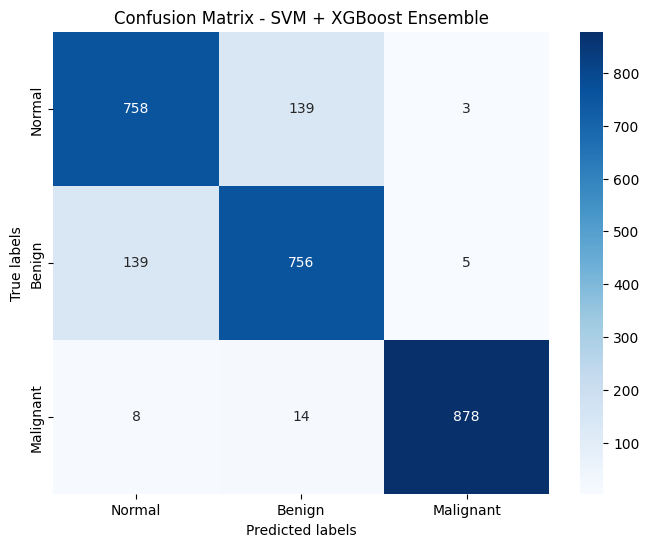

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Combined Ensemble Combined Test accuracy: 0.8874
Combined Ensemble Combined Test loss: 0.3256
Combined Ensemble Classification Report:
              precision    recall  f1-score   support

      Normal       0.84      0.85      0.84       900
      Benign       0.83      0.84      0.84       900
   Malignant       0.99      0.98      0.98       900

    accuracy                           0.89      2700
   macro avg       0.89      0.89      0.89      2700
weighted avg       0.89      0.89      0.89      2700



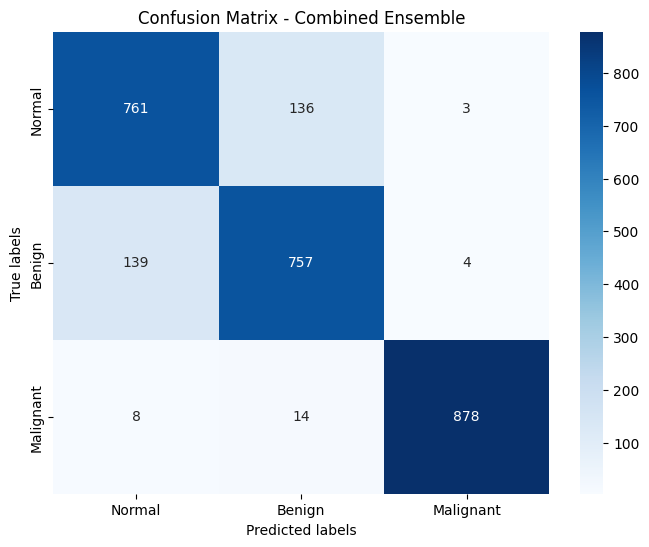

In [ ]:
import numpy as np
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

# Load MobileNet without top classification layers
mobilenet_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add GlobalAveragePooling layer
mobilenet_output = GlobalAveragePooling2D()(mobilenet_model.output)

# Create model for feature extraction
mobilenet_extractor = Model(inputs=mobilenet_model.input, outputs=mobilenet_output)

# Assuming train_images, train_labels, val_images, val_labels, test_images, test_labels are defined elsewhere

# Extract features from MobileNet
train_features_mobilenet = mobilenet_extractor.predict(train_images)
val_features_mobilenet = mobilenet_extractor.predict(val_images)
test_features_mobilenet = mobilenet_extractor.predict(test_images)

# Combine features
train_features = train_features_mobilenet
val_features = val_features_mobilenet
test_features = test_features_mobilenet

# Combine validation and test features for classification
combined_features = np.concatenate((val_features, test_features), axis=0)
combined_labels = np.concatenate((np.argmax(val_labels, axis=1), np.argmax(test_labels, axis=1)), axis=0)

# Train individual classifiers
rf = RandomForestClassifier(n_estimators=100)
svm = SVC(probability=True)
xgb = XGBClassifier()

classifiers = {
    'Random Forest': rf,
    'SVM': svm,
    'XGBoost': xgb,
}

# Fit individual classifiers on the training features
for name, clf in classifiers.items():
    clf.fit(train_features, np.argmax(train_labels, axis=1))

# Create separate ensembles
svm_xgb_ensemble = VotingClassifier(estimators=[
    ('svm', svm),
    ('xgb', xgb)
], voting='soft')

# Fit SVM + XGBoost ensemble
svm_xgb_ensemble.fit(train_features, np.argmax(train_labels, axis=1))

# Create combined ensemble of RandomForest, SVM, and XGBoost
combined_ensemble = VotingClassifier(estimators=[
    ('rf', rf),
    ('svm', svm),
    ('xgb', xgb)
], voting='soft')

# Fit combined ensemble
combined_ensemble.fit(train_features, np.argmax(train_labels, axis=1))

# Evaluate individual classifiers and ensembles
for name, clf in classifiers.items():
    preds = clf.predict(combined_features)
    prob_preds = clf.predict_proba(combined_features)
    accuracy = accuracy_score(combined_labels, preds)
    loss = log_loss(combined_labels, prob_preds)
    print(f'{name} Combined Test accuracy: {accuracy:.4f}')
    print(f'{name} Combined Test loss: {loss:.4f}')

    conf_matrix = confusion_matrix(combined_labels, preds)
    print(f'{name} Classification Report:')
    print(classification_report(combined_labels, preds, target_names=['Normal', 'Benign', 'Malignant']))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Normal', 'Benign', 'Malignant'], yticklabels=['Normal', 'Benign', 'Malignant'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Evaluate SVM + XGBoost ensemble
for name, clf in {'SVM + XGBoost Ensemble': svm_xgb_ensemble}.items():
    preds = clf.predict(combined_features)
    prob_preds = clf.predict_proba(combined_features)
    accuracy = accuracy_score(combined_labels, preds)
    loss = log_loss(combined_labels, prob_preds)
    print(f'{name} Combined Test accuracy: {accuracy:.4f}')
    print(f'{name} Combined Test loss: {loss:.4f}')

    conf_matrix = confusion_matrix(combined_labels, preds)
    print(f'{name} Classification Report:')
    print(classification_report(combined_labels, preds, target_names=['Normal', 'Benign', 'Malignant']))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Normal', 'Benign', 'Malignant'], yticklabels=['Normal', 'Benign', 'Malignant'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Evaluate combined ensemble
for name, clf in {'Combined Ensemble': combined_ensemble}.items():
    preds = clf.predict(combined_features)
    prob_preds = clf.predict_proba(combined_features)
    accuracy = accuracy_score(combined_labels, preds)
    loss = log_loss(combined_labels, prob_preds)
    print(f'{name} Combined Test accuracy: {accuracy:.4f}')
    print(f'{name} Combined Test loss: {loss:.4f}')

    conf_matrix = confusion_matrix(combined_labels, preds)
    print(f'{name} Classification Report:')
    print(classification_report(combined_labels, preds, target_names=['Normal', 'Benign', 'Malignant']))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Normal', 'Benign', 'Malignant'], yticklabels=['Normal', 'Benign', 'Malignant'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


In [ ]:
print(np.shape(train_features))

(6300, 1920)


Random Forest Combined Test accuracy: 0.8722
Random Forest Combined Test loss: 0.3718
Random Forest Classification Report:
              precision    recall  f1-score   support

      Normal       0.80      0.85      0.83       900
      Benign       0.83      0.79      0.81       900
   Malignant       0.99      0.97      0.98       900

    accuracy                           0.87      2700
   macro avg       0.87      0.87      0.87      2700
weighted avg       0.87      0.87      0.87      2700



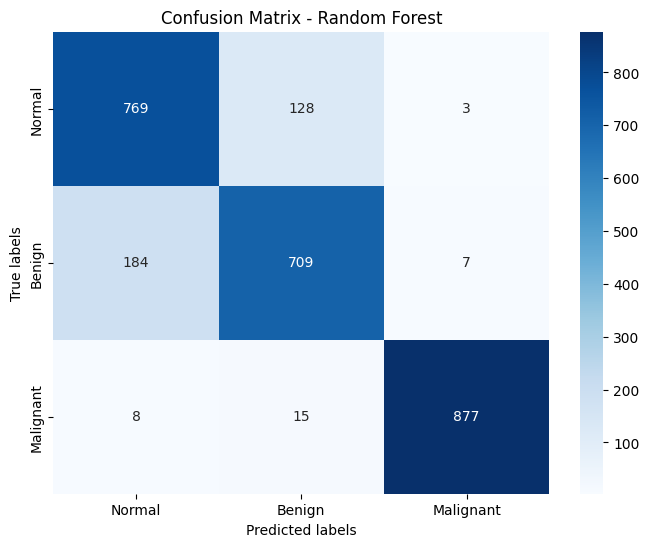

SVM Combined Test accuracy: 0.8922
SVM Combined Test loss: 0.2880
SVM Classification Report:
              precision    recall  f1-score   support

      Normal       0.85      0.85      0.85       900
      Benign       0.84      0.85      0.84       900
   Malignant       0.99      0.98      0.98       900

    accuracy                           0.89      2700
   macro avg       0.89      0.89      0.89      2700
weighted avg       0.89      0.89      0.89      2700



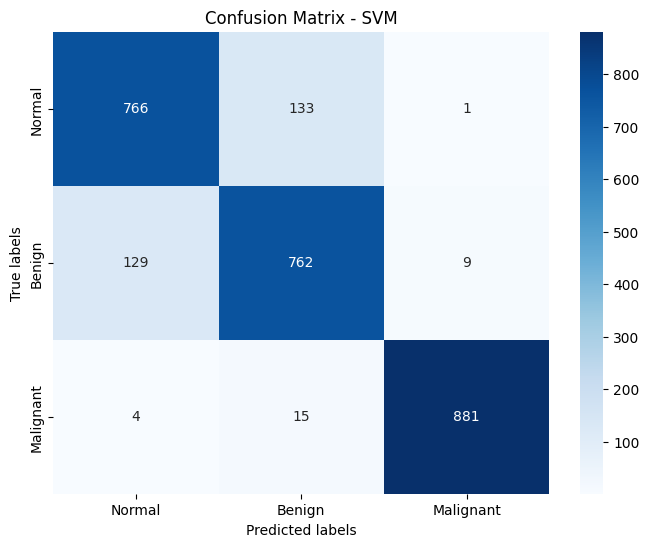

XGBoost Combined Test accuracy: 0.8933
XGBoost Combined Test loss: 0.3101
XGBoost Classification Report:
              precision    recall  f1-score   support

      Normal       0.84      0.87      0.86       900
      Benign       0.85      0.84      0.84       900
   Malignant       0.98      0.98      0.98       900

    accuracy                           0.89      2700
   macro avg       0.89      0.89      0.89      2700
weighted avg       0.89      0.89      0.89      2700



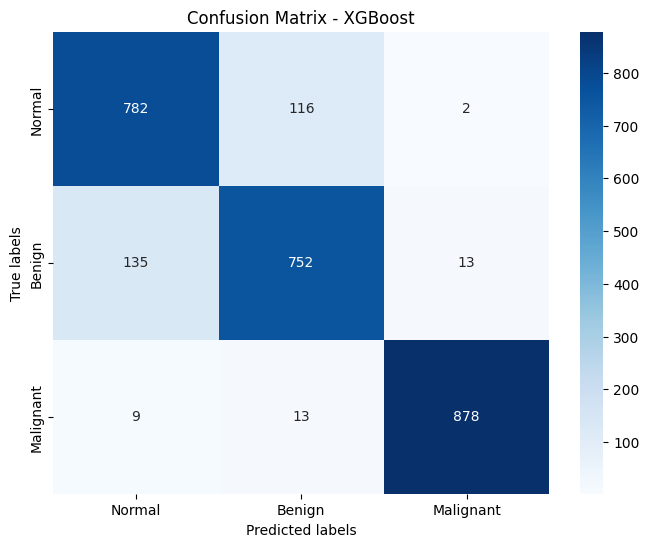

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


SVM + XGBoost Ensemble Combined Test accuracy: 0.8978
SVM + XGBoost Ensemble Combined Test loss: 0.2649
SVM + XGBoost Ensemble Classification Report:
              precision    recall  f1-score   support

      Normal       0.85      0.87      0.86       900
      Benign       0.86      0.84      0.85       900
   Malignant       0.99      0.98      0.98       900

    accuracy                           0.90      2700
   macro avg       0.90      0.90      0.90      2700
weighted avg       0.90      0.90      0.90      2700



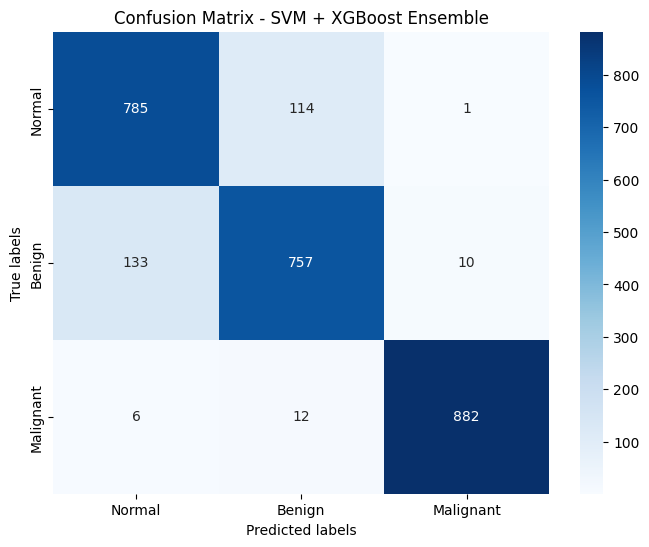

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Combined Ensemble Combined Test accuracy: 0.8981
Combined Ensemble Combined Test loss: 0.2846
Combined Ensemble Classification Report:
              precision    recall  f1-score   support

      Normal       0.85      0.87      0.86       900
      Benign       0.86      0.84      0.85       900
   Malignant       0.99      0.98      0.98       900

    accuracy                           0.90      2700
   macro avg       0.90      0.90      0.90      2700
weighted avg       0.90      0.90      0.90      2700



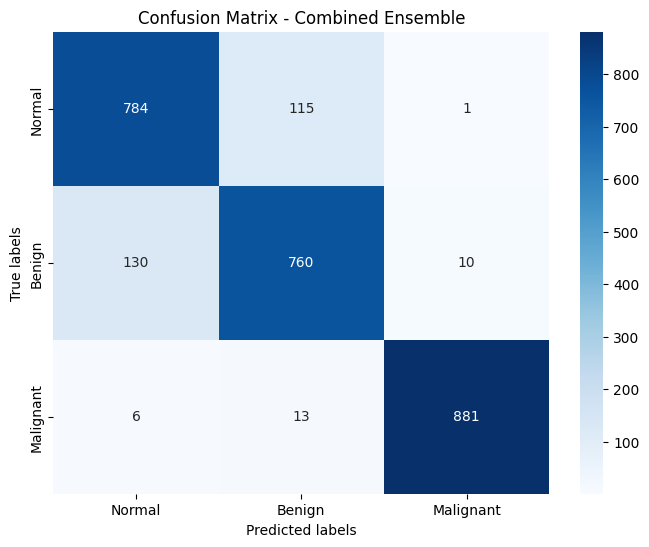

In [ ]:
# Combine features
train_features = train_features_densenet201
val_features = val_features_densenet201
test_features = test_features_densenet201

# Combine validation and test features for classification
combined_features = np.concatenate((val_features, test_features), axis=0)
combined_labels = np.concatenate((np.argmax(val_labels, axis=1), np.argmax(test_labels, axis=1)), axis=0)

# Train individual classifiers
rf = RandomForestClassifier(n_estimators=100)
svm = SVC(probability=True)
xgb = XGBClassifier()

classifiers = {
    'Random Forest': rf,
    'SVM': svm,
    'XGBoost': xgb,
}

# Fit individual classifiers on the training features
for name, clf in classifiers.items():
    clf.fit(train_features, np.argmax(train_labels, axis=1))

# Create separate ensembles
svm_xgb_ensemble = VotingClassifier(estimators=[
    ('svm', svm),
    ('xgb', xgb)
], voting='soft')

# Fit SVM + XGBoost ensemble
svm_xgb_ensemble.fit(train_features, np.argmax(train_labels, axis=1))

# Create combined ensemble of RandomForest, SVM, and XGBoost
combined_ensemble = VotingClassifier(estimators=[
    ('rf', rf),
    ('svm', svm),
    ('xgb', xgb)
], voting='soft')

# Fit combined ensemble
combined_ensemble.fit(train_features, np.argmax(train_labels, axis=1))

# Evaluate individual classifiers and ensembles
for name, clf in classifiers.items():
    preds = clf.predict(combined_features)
    prob_preds = clf.predict_proba(combined_features)
    accuracy = accuracy_score(combined_labels, preds)
    loss = log_loss(combined_labels, prob_preds)
    print(f'{name} Combined Test accuracy: {accuracy:.4f}')
    print(f'{name} Combined Test loss: {loss:.4f}')

    conf_matrix = confusion_matrix(combined_labels, preds)
    print(f'{name} Classification Report:')
    print(classification_report(combined_labels, preds, target_names=['Normal', 'Benign', 'Malignant']))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Normal', 'Benign', 'Malignant'], yticklabels=['Normal', 'Benign', 'Malignant'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Evaluate SVM + XGBoost ensemble
for name, clf in {'SVM + XGBoost Ensemble': svm_xgb_ensemble}.items():
    preds = clf.predict(combined_features)
    prob_preds = clf.predict_proba(combined_features)
    accuracy = accuracy_score(combined_labels, preds)
    loss = log_loss(combined_labels, prob_preds)
    print(f'{name} Combined Test accuracy: {accuracy:.4f}')
    print(f'{name} Combined Test loss: {loss:.4f}')

    conf_matrix = confusion_matrix(combined_labels, preds)
    print(f'{name} Classification Report:')
    print(classification_report(combined_labels, preds, target_names=['Normal', 'Benign', 'Malignant']))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Normal', 'Benign', 'Malignant'], yticklabels=['Normal', 'Benign', 'Malignant'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Evaluate combined ensemble
for name, clf in {'Combined Ensemble': combined_ensemble}.items():
    preds = clf.predict(combined_features)
    prob_preds = clf.predict_proba(combined_features)
    accuracy = accuracy_score(combined_labels, preds)
    loss = log_loss(combined_labels, prob_preds)
    print(f'{name} Combined Test accuracy: {accuracy:.4f}')
    print(f'{name} Combined Test loss: {loss:.4f}')

    conf_matrix = confusion_matrix(combined_labels, preds)
    print(f'{name} Classification Report:')
    print(classification_report(combined_labels, preds, target_names=['Normal', 'Benign', 'Malignant']))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Normal', 'Benign', 'Malignant'], yticklabels=['Normal', 'Benign', 'Malignant'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()


57/57 [==============================] - 44s 765ms/step
SVM Combined Test accuracy: 0.8922
SVM Class-wise Accuracy:
Class 0 (Normal): 0.8511
Class 1 (Benign): 0.8467
Class 2 (Malignant): 0.9789
SVM Classification Report:
              precision    recall  f1-score   support

      Normal       0.85      0.85      0.85       900
      Benign       0.84      0.85      0.84       900
   Malignant       0.99      0.98      0.98       900

    accuracy                           0.89      2700
   macro avg       0.89      0.89      0.89      2700
weighted avg       0.89      0.89      0.89      2700



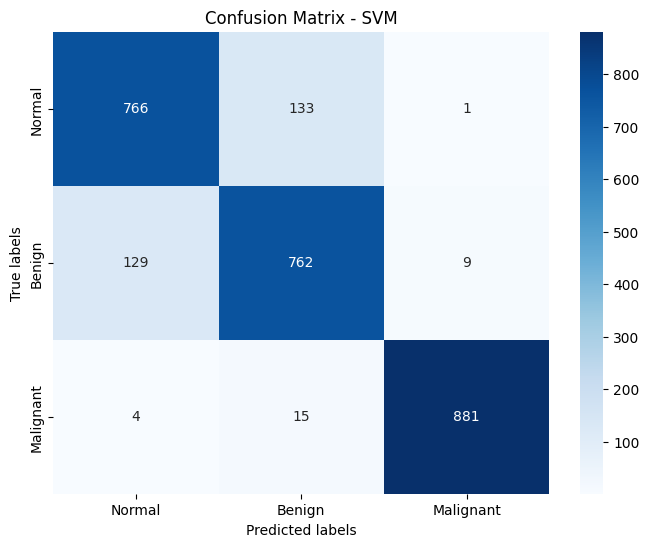

XGBoost Combined Test accuracy: 0.8933
XGBoost Class-wise Accuracy:
Class 0 (Normal): 0.8689
Class 1 (Benign): 0.8356
Class 2 (Malignant): 0.9756
XGBoost Classification Report:
              precision    recall  f1-score   support

      Normal       0.84      0.87      0.86       900
      Benign       0.85      0.84      0.84       900
   Malignant       0.98      0.98      0.98       900

    accuracy                           0.89      2700
   macro avg       0.89      0.89      0.89      2700
weighted avg       0.89      0.89      0.89      2700



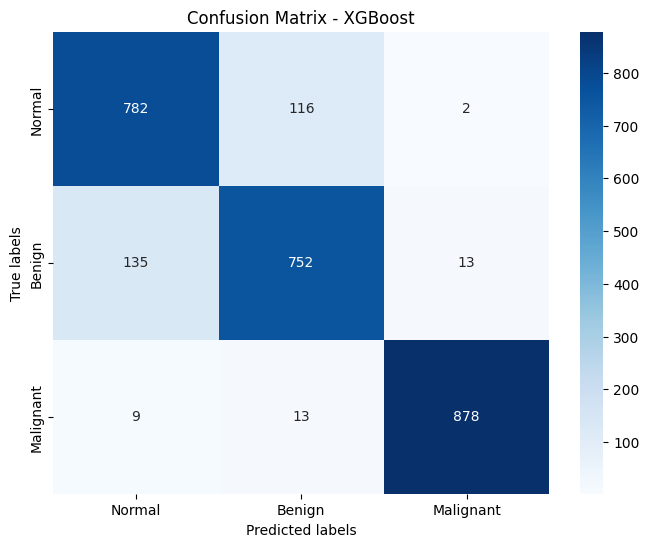

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


SVM + XGBoost Ensemble Combined Test accuracy: 0.8981
SVM + XGBoost Ensemble Class-wise Accuracy:
Class 0 (Normal): 0.8722
Class 1 (Benign): 0.8422
Class 2 (Malignant): 0.9800
SVM + XGBoost Ensemble Classification Report:
              precision    recall  f1-score   support

      Normal       0.85      0.87      0.86       900
      Benign       0.86      0.84      0.85       900
   Malignant       0.99      0.98      0.98       900

    accuracy                           0.90      2700
   macro avg       0.90      0.90      0.90      2700
weighted avg       0.90      0.90      0.90      2700



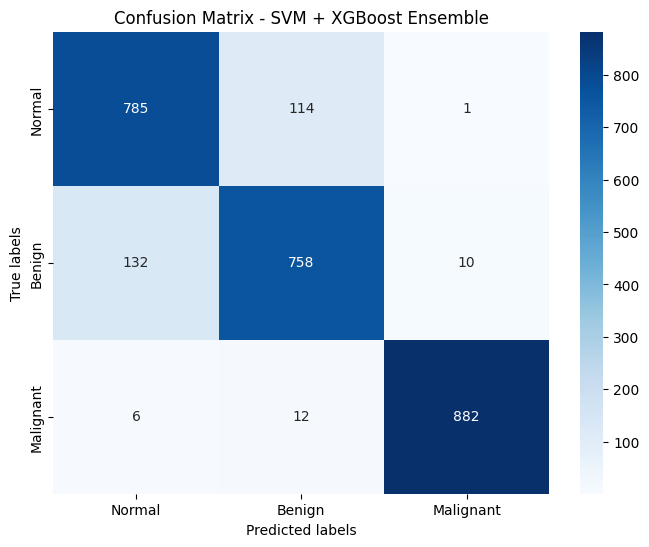

In [ ]:
import numpy as np
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, log_loss
import matplotlib.pyplot as plt
import seaborn as sns

# Load DenseNet201 without top classification layers
densenet201_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add GlobalAveragePooling layer
densenet201_output = GlobalAveragePooling2D()(densenet201_model.output)

# Create model for feature extraction
densenet201_extractor = Model(inputs=densenet201_model.input, outputs=densenet201_output)

# Assuming train_images, train_labels, val_images, val_labels, test_images, test_labels are defined elsewhere

# Extract features from DenseNet201
train_features_densenet201 = densenet201_extractor.predict(train_images)
val_features_densenet201 = densenet201_extractor.predict(val_images)
test_features_densenet201 = densenet201_extractor.predict(test_images)

# Combine features
train_features = train_features_densenet201
val_features = val_features_densenet201
test_features = test_features_densenet201

# Combine validation and test features for classification
combined_features = np.concatenate((val_features, test_features), axis=0)
combined_labels = np.concatenate((np.argmax(val_labels, axis=1), np.argmax(test_labels, axis=1)), axis=0)

# Train individual classifiers
rf = RandomForestClassifier(n_estimators=100)
svm = SVC(probability=True)
xgb = XGBClassifier()

classifiers = {
    'SVM': svm,
    'XGBoost': xgb,
}

# Fit individual classifiers on the training features
for name, clf in classifiers.items():
    clf.fit(train_features, np.argmax(train_labels, axis=1))

# Create separate ensembles
svm_xgb_ensemble = VotingClassifier(estimators=[
    ('svm', svm),
    ('xgb', xgb)
], voting='soft')

# Fit SVM + XGBoost ensemble
svm_xgb_ensemble.fit(train_features, np.argmax(train_labels, axis=1))

# Evaluate individual classifiers and ensembles
for name, clf in classifiers.items():
    preds = clf.predict(combined_features)
    prob_preds = clf.predict_proba(combined_features)
    accuracy = accuracy_score(combined_labels, preds)
    loss = log_loss(combined_labels, prob_preds)
    print(f'{name} Combined Test accuracy: {accuracy:.4f}')
    #print(f'{name} Combined Test loss: {loss:.4f}')

    conf_matrix = confusion_matrix(combined_labels, preds)

    # Class-wise accuracy
    class_wise_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
    print(f'{name} Class-wise Accuracy:')
    for idx, acc in enumerate(class_wise_accuracy):
        print(f'Class {idx} ({["Normal", "Benign", "Malignant"][idx]}): {acc:.4f}')

    print(f'{name} Classification Report:')
    print(classification_report(combined_labels, preds, target_names=['Normal', 'Benign', 'Malignant']))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Normal', 'Benign', 'Malignant'], yticklabels=['Normal', 'Benign', 'Malignant'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

# Evaluate SVM + XGBoost ensemble
for name, clf in {'SVM + XGBoost Ensemble': svm_xgb_ensemble}.items():
    preds = clf.predict(combined_features)
    prob_preds = clf.predict_proba(combined_features)
    accuracy = accuracy_score(combined_labels, preds)
    loss = log_loss(combined_labels, prob_preds)
    print(f'{name} Combined Test accuracy: {accuracy:.4f}')
   # print(f'{name} Combined Test loss: {loss:.4f}')

    conf_matrix = confusion_matrix(combined_labels, preds)

    # Class-wise accuracy
    class_wise_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
    print(f'{name} Class-wise Accuracy:')
    for idx, acc in enumerate(class_wise_accuracy):
        print(f'Class {idx} ({["Normal", "Benign", "Malignant"][idx]}): {acc:.4f}')

    print(f'{name} Classification Report:')
    print(classification_report(combined_labels, preds, target_names=['Normal', 'Benign', 'Malignant']))
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Normal', 'Benign', 'Malignant'], yticklabels=['Normal', 'Benign', 'Malignant'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
